In [3]:
import pandas as pd #import pandas for the project

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv') #create a dataframe using the .csv

In [5]:
df.head(10) #see the data of the first 10 rows

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4


In [6]:
df.shape #see the shape of the dataframe (212,331 rows and 15 columns)

(212331, 15)

In [7]:
df.count() #attempt to see how many null values. I realized that the null values in this dataframe were not "NaN"

School DBN                     212331
School Name                    212331
School Level                   212331
Regents Exam                   212321
Year                           212331
Total Tested                   212331
Mean Score                     212331
Number Scoring Below 65        212331
Percent Scoring Below 65       212331
Number Scoring 65 or Above     212331
Percent Scoring 65 or Above    212331
Number Scoring 80 or Above     212331
Percent Scoring 80 or Above    212331
Number Scoring CR              212331
Percent Scoring CR             212331
dtype: int64

In [8]:
missing_values = ["n/a","na","--",'nan','s'] #create a missing values list

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values=missing_values) #recreate the dataframe changing all na values into NaN

In [10]:
df.head(3) #ensure the null values are now in the dataframe

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN


In [11]:
df['Year'].unique() #see how many unique years are in the "Year" column

array([2017, 2015, 2016])

In [12]:
df.count() #see where the null values are located. Most are in the "CR" columns

School DBN                     212331
School Name                    212331
School Level                   212331
Regents Exam                   212321
Year                           212331
Total Tested                   212331
Mean Score                     137109
Number Scoring Below 65        137109
Percent Scoring Below 65       137109
Number Scoring 65 or Above     137109
Percent Scoring 65 or Above    137109
Number Scoring 80 or Above     137109
Percent Scoring 80 or Above    137109
Number Scoring CR               69651
Percent Scoring CR              69651
dtype: int64

In [13]:
df2 = df[df['School DBN'].str.contains('034')] #create a new dataframe with all "School Name" the contains "034"

In [14]:
df2

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
16794,31R034,I.S. 034 Tottenville,Junior High-Intermediate-Middle,Common Core Algebra,2015,97,77.3,0.0,0.0,97.0,100.0,27.0,27.8,95.0,97.9
16795,31R034,I.S. 034 Tottenville,Junior High-Intermediate-Middle,Common Core Algebra,2016,65,86.7,0.0,0.0,65.0,100.0,63.0,96.9,65.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203596,31R034,I.S. 034 Tottenville,Junior High-Intermediate-Middle,U.S. History and Government,2016,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203597,31R034,I.S. 034 Tottenville,Junior High-Intermediate-Middle,U.S. History and Government,2016,54,92.4,0.0,0.0,54.0,100.0,53.0,98.1,NaN,NaN
203598,31R034,I.S. 034 Tottenville,Junior High-Intermediate-Middle,U.S. History and Government,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203599,31R034,I.S. 034 Tottenville,Junior High-Intermediate-Middle,U.S. History and Government,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
import numpy as np #import numpy for my research question involving adding a boroughs column

In [16]:
conditions = [
              (df['School DBN'].str.contains('M')),
               (df['School DBN'].str.contains('R')),
               (df['School DBN'].str.contains('X')),
               (df['School DBN'].str.contains('Q')),
               (df['School DBN'].str.contains('K'))
] #create a conditions function finding a certain letter in the string of the "School DBN" column that coincides with each borough

In [17]:
values = ['Manhattan', 'Staten Island', 'Bronx', 'Queens', 'Brooklyn'] #create a values function that will conicide with each function of the "conditions" above

In [18]:
df['BR'] = np.select(conditions, values) #create a new "BR"/"Boroughs" column utilizing np.select

In [19]:
df #see the new dataframe with the new "BR" column

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,BR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN,Manhattan
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN,Manhattan
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx


In [20]:
df = df.drop(['Number Scoring CR','Percent Scoring CR'],axis=1) #drop all "CR" columns since I won't need this data 

In [21]:
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,BR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,Manhattan
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,Manhattan
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3.0,33.3,6.0,66.7,0.0,0.0,Manhattan
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2.0,13.3,13.0,86.7,5.0,33.3,Manhattan
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5.0,55.6,4.0,44.4,1.0,11.1,Manhattan
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9,Manhattan
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7,Manhattan


In [22]:
df3 = df.dropna(how='any',axis=0) #drop all null values because they seem to be located in small sample data (where all the data in the row is null)

In [23]:
df3.count() #check to see if removing the null values creates a dataframe that has columns with all the same amount of data

School DBN                     137101
School Name                    137101
School Level                   137101
Regents Exam                   137101
Year                           137101
Total Tested                   137101
Mean Score                     137101
Number Scoring Below 65        137101
Percent Scoring Below 65       137101
Number Scoring 65 or Above     137101
Percent Scoring 65 or Above    137101
Number Scoring 80 or Above     137101
Percent Scoring 80 or Above    137101
BR                             137101
dtype: int64

In [24]:
import matplotlib.pyplot as plt #import matplotlib to create a few plots


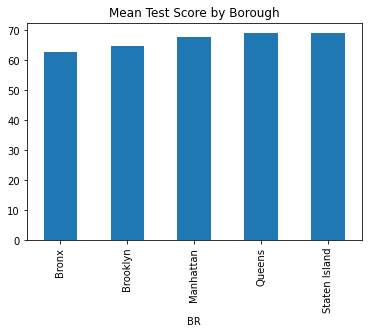

In [25]:
df3.groupby(['BR'])['Mean Score'].mean().plot(kind='bar',title="Mean Test Score by Borough") #group by Borough using the mean of the "mean score column" then plot a bar graph. Looking at the graph I notice that Bronx has the lowest mean score and Queens and Staten Island seem about equal as the highest.

In [26]:
df3['Total Tested'].sum() #sum the total tested column to see how many tests were given between 2015 and 2017

9814371

In [27]:
df.groupby(['Year','Regents Exam'])['Total Tested'].sum() #group by both Year and Regents exam using the sum of total tested to see how many of each regents test was given yearly

Year  Regents Exam                   
2015  Algebra2/Trigonometry              176890
      Common Core Algebra                398005
      Common Core English                188100
      Common Core Geometry               199570
      English                            378255
      Geometry                           264850
      Global History and Geography       489105
      Integrated Algebra                 301295
      Living Environment                 469200
      Physical Settings/Chemistry        153770
      Physical Settings/Earth Science    198140
      Physical Settings/Physics           68470
      U.S. History and Government        400690
2016  Algebra2/Trigonometry              170280
      Common Core Algebra                568530
      Common Core Algebra2               133700
      Common Core English                418815
      Common Core Geometry               239515
      English                             61450
      Geometry                            35780
  

In [28]:
df3.groupby(['BR','Regents Exam'])['Mean Score'].mean().round(1) #group by borough and Regents exam using the mean of Mean score column. At first he numbers had too many decimals so I rounded to the first decimal

BR             Regents Exam                   
Bronx          Algebra2/Trigonometry              53.0
               Common Core Algebra                64.3
               Common Core Algebra2               60.2
               Common Core English                66.6
               Common Core Geometry               55.9
                                                  ... 
Staten Island  Living Environment                 74.3
               Physical Settings/Chemistry        67.4
               Physical Settings/Earth Science    63.0
               Physical Settings/Physics          69.3
               U.S. History and Government        76.7
Name: Mean Score, Length: 70, dtype: float64

In [29]:
df4 = df3[df3['Regents Exam'].str.contains('Geometry')] #create a new dataframe that focuses only on regents that pertain to Geometry

In [30]:
df4

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,BR
28,01M292,Orchard Collegiate Academy,High school,Common Core Geometry,2015,10,49.2,9.0,90.0,1.0,10.0,0.0,0.0,Manhattan
30,01M292,Orchard Collegiate Academy,High school,Common Core Geometry,2017,11,56.8,9.0,81.8,2.0,18.2,0.0,0.0,Manhattan
33,01M292,Orchard Collegiate Academy,High school,Geometry,2015,18,57.8,12.0,66.7,6.0,33.3,1.0,5.6,Manhattan
70,01M448,University Neighborhood High School,High school,Common Core Geometry,2015,76,56.4,59.0,77.6,17.0,22.4,2.0,2.6,Manhattan
71,01M448,University Neighborhood High School,High school,Common Core Geometry,2016,92,60.9,55.0,59.8,37.0,40.2,6.0,6.5,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212244,84X704,KIPP Academy Charter School,K-12 all grades,Common Core Geometry,2015,22,59.2,18.0,81.8,4.0,18.2,1.0,4.5,Bronx
212246,84X704,KIPP Academy Charter School,K-12 all grades,Common Core Geometry,2016,41,68.0,11.0,26.8,30.0,73.2,3.0,7.3,Bronx
212249,84X704,KIPP Academy Charter School,K-12 all grades,Common Core Geometry,2017,39,66.9,13.0,33.3,26.0,66.7,4.0,10.3,Bronx
212255,84X704,KIPP Academy Charter School,K-12 all grades,Geometry,2015,10,67.4,1.0,10.0,9.0,90.0,0.0,0.0,Bronx


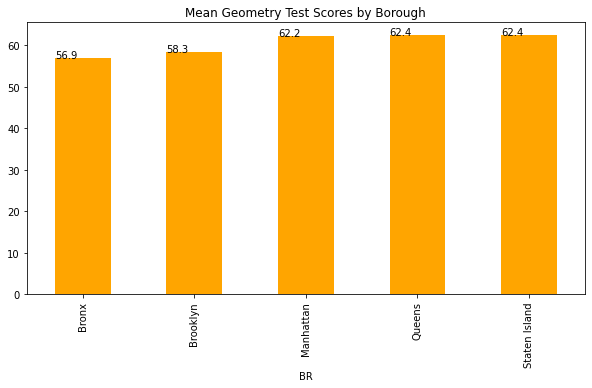

In [38]:
ax = df4.groupby(['BR'])['Mean Score'].mean().round(1).plot(kind='bar', color='orange',title='Mean Geometry Test Scores by Borough',figsize=(10,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height())) #create a bar graph of Geometry test scores grouped by borough. I also added an annotate function to add the mean score to each bar.
    #I notice that again the bronx has the lower mean score in Geometry

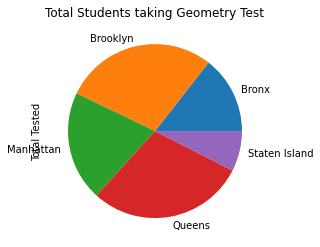

In [32]:
df4.groupby(['BR'])['Total Tested'].sum().plot(kind='pie',title='Total Students taking Geometry Test') #create a pie chart to see which borough had the most Geometry tests taken and which had the fewest. Staten Island had the least

In [34]:
df5 = df4[df4['BR'].str.contains('Bronx')] #Create new dataframe to focus only on Geometry scores in the bronx

In [35]:
df5.head(4)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,BR
3950,07X221,South Bronx Preparatory: A College Board School,Secondary School,Common Core Geometry,2015,7,72.4,1.0,14.3,6.0,85.7,1.0,14.3,Bronx
3951,07X221,South Bronx Preparatory: A College Board School,Secondary School,Common Core Geometry,2016,48,61.3,28.0,58.3,20.0,41.7,0.0,0.0,Bronx
3952,07X221,South Bronx Preparatory: A College Board School,Secondary School,Common Core Geometry,2017,66,63.6,32.0,48.5,34.0,51.5,3.0,4.5,Bronx
3955,07X221,South Bronx Preparatory: A College Board School,Secondary School,Geometry,2015,18,77.7,0.0,0.0,18.0,100.0,4.0,22.2,Bronx


In [39]:
df5.sort_values(by='Mean Score',ascending="false") #sort Mean Score values from lowest to highest

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,BR
30110,09X414,Jonathan Levin High School for Media and Commu...,High school,Geometry,2015,6,30.7,6.0,100.0,0.0,0.0,0.0,0.0,Bronx
27918,08X305,Pablo Neruda Academy,High school,Common Core Geometry,2016,9,30.9,9.0,100.0,0.0,0.0,0.0,0.0,Bronx
74439,12X248,"Metropolitan High School, The",High school,Common Core Geometry,2016,8,32.3,8.0,100.0,0.0,0.0,0.0,0.0,Bronx
68082,09X250,Eximius College Preparatory Academy: A College...,High school,Common Core Geometry,2015,6,32.8,6.0,100.0,0.0,0.0,0.0,0.0,Bronx
29795,09X329,DreamYard Preparatory School,High school,Common Core Geometry,2016,14,33.4,14.0,100.0,0.0,0.0,0.0,0.0,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,10X696,High School of American Studies at Lehman College,High school,Geometry,2016,21,91.9,0.0,0.0,21.0,100.0,20.0,95.2,Bronx
165406,10X445,Bronx High School of Science,High school,Geometry,2015,462,91.9,1.0,0.2,461.0,99.8,440.0,95.2,Bronx
32369,10X696,High School of American Studies at Lehman College,High school,Geometry,2016,21,91.9,0.0,0.0,21.0,100.0,20.0,95.2,Bronx
116398,10X696,High School of American Studies at Lehman College,High school,Geometry,2016,14,92.6,0.0,0.0,14.0,100.0,13.0,92.9,Bronx


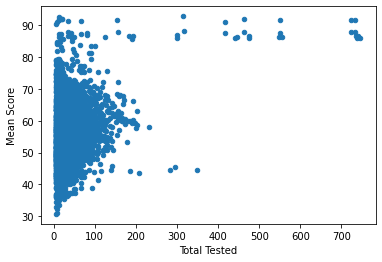

In [37]:
df5.plot(kind='scatter',x='Total Tested',y='Mean Score') #create a scatter plot making the total amount of students tested as the independent variable and Mean score as the dependent variable. Of note it appears that schools that tested the most amount of students did best on the geometry tests in the bronx.